# Sample Workflow with quickerstats
---
Aaron Anderson <br>
https://github.com/anderaa/quickerstats

---

In this example, we will demonstrate how to use the quickerstats package to search for and download data from the NASS Quick Stats database. Our goal will be to produce a map that shows intensity of corn production across US counties.

---
## 1. Installation and setup

Install the package from the current github repo, then load it:

In [1]:
devtools::install_github('anderaa/quickerstats', force=TRUE, build_vignettes=TRUE, ref='development')
library('quickerstats')

hms (0.5.1 -> 0.5.2) [CRAN]


Installing 1 packages: hms



  There is a binary version available but the source version is later:
    binary source needs_compilation
hms  0.5.1  0.5.2             FALSE



installing the source package ‘hms’



✔  checking for file ‘/private/var/folders/xb/3_n3p00j4_x83n2s7tpn95gm0000gn/T/RtmpkMIRI5/remotesefe66d307b3a/anderaa-quickerstats-47c901c/DESCRIPTION’
─  preparing ‘quickerstats’:
✔  checking DESCRIPTION meta-information
─  installing the package to build vignettes
✔  creating vignettes (1m 6s)
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘quickerstats_0.0.0.9003.tar.gz’
   


Now setup your NASS key. Go to https://quickstats.nass.usda.gov/api and get your key. I recommend storing your key as an environmental variable. In R studio, type `file.edit("~/.Renviron")` and add `NASS_KEY='your_nass_key'` to the file. Alternatively, open a terminal (mac/linux) and type `nano ~/.Renviron` and add the same line. Save it with ctl+o then press enter. Then exit with ctl+x.

Now load the key into the current R session:

In [2]:
key = Sys.getenv('NASS_KEY')

In [3]:
library(maps)
library(maptools)
library(rgdal)
library(mapproj)
library(tmap)
library(tmaptools)
options(warn=-1)

Loading required package: sp
Checking rgeos availability: TRUE
rgdal: version: 1.4-6, (SVN revision 841)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.2, released 2019/06/28
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 5.2.0, September 15th, 2018, [PJ_VERSION: 520]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rgdal/proj
 Linking to sp version: 1.3-1 


---
## 2. Search for data 
We need to find data series that indicate the amounts of corn harvested. To do this, we use the search function.

In [5]:
r <- search_data_items(key, search_terms=c('corn', 'harvested'), exclude=c('sweet', 'silage'))
print(r)

 [1] "CORN - ACRES HARVESTED"                                                          
 [2] "CORN - OPERATIONS WITH AREA HARVESTED"                                           
 [3] "CORN, FORAGE - ACRES HARVESTED"                                                  
 [4] "CORN, GRAIN - ACRES HARVESTED"                                                   
 [5] "CORN, GRAIN - OPERATIONS WITH AREA HARVESTED"                                    
 [6] "CORN, GRAIN - PROGRESS, 5 YEAR AVG, MEASURED IN PCT HARVESTED"                   
 [7] "CORN, GRAIN - PROGRESS, MEASURED IN PCT HARVESTED"                               
 [8] "CORN, GRAIN - PROGRESS, PREVIOUS YEAR, MEASURED IN PCT HARVESTED"                
 [9] "CORN, GRAIN, IRRIGATED - ACRES HARVESTED"                                        
[10] "CORN, GRAIN, IRRIGATED - AREA HARVESTED, MEASURED IN PCT BY METHOD"              
[11] "CORN, GRAIN, IRRIGATED - AREA HARVESTED, MEASURED IN PCT OF OPERATIONS BY METHOD"
[12] "CORN, GRAIN, IRRIGATED - O

It looks like the first result is the one we want.

In [6]:
data_item <- r[1]
print(data_item)

[1] "CORN - ACRES HARVESTED"


Now, let's get the options associated with this data item. We need make sure we can get it for a recent year and for individual counties.

In [7]:
get_options(key, data_item)

Retrieving options...this may take a minute...
The data item is not available at the state or county level.
             There are no options.


NULL

Oops, that data item doesn't have any options associated with it, so let's try a different one.

In [8]:
data_item <- r[4]
print(data_item)

[1] "CORN, GRAIN - ACRES HARVESTED"


In [9]:
get_options(key, data_item)

Retrieving options...this may take a minute...


source_desc,year,agg_level_desc,domain_desc
<chr>,<chr>,<chr>,<chr>
CENSUS,1997,COUNTY,TOTAL
CENSUS,1997,STATE,AREA HARVESTED
CENSUS,1997,STATE,TOTAL
CENSUS,2002,COUNTY,TOTAL
CENSUS,2002,STATE,AREA HARVESTED
CENSUS,2002,STATE,TOTAL
CENSUS,2007,COUNTY,TOTAL
CENSUS,2007,STATE,AREA HARVESTED
CENSUS,2007,STATE,TOTAL


We see that census data is available at the county-level for 2017. Let's pull that data.

---
## 3. Download the data

In [10]:
df_harvested <- get_county_data(key=key, 
                                year=2017, 
                                data_item=data_item,
                                source='CENSUS',
                                domain='TOTAL',
                                fips='all')

Parsed with column specification:
cols(
  .default = col_character(),
  asd_code = col_double(),
  region_desc = col_logical(),
  zip_5 = col_logical(),
  watershed_desc = col_logical(),
  congr_district_code = col_logical(),
  country_code = col_double(),
  year = col_double(),
  week_ending = col_logical(),
  load_time = col_datetime(format = "")
)
See spec(...) for full column specifications.


Let's make sure the data look reasonable.

In [11]:
# print number of rows and columns
print(dim(df_harvested))

# print first rows of data
head(df_harvested)

[1] 2643   39


source_desc,sector_desc,group_desc,commodity_desc,class_desc,prodn_practice_desc,util_practice_desc,statisticcat_desc,unit_desc,short_desc,⋯,location_desc,year,freq_desc,begin_code,end_code,reference_period_desc,week_ending,load_time,Value,CV (%)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dttm>,<chr>,<chr>
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,AREA HARVESTED,ACRES,"CORN, GRAIN - ACRES HARVESTED",⋯,"ALABAMA, NORTHERN VALLEY, COLBERT",2017,ANNUAL,00,00,YEAR,NA,2018-02-01,"22,148",25.7
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,AREA HARVESTED,ACRES,"CORN, GRAIN - ACRES HARVESTED",⋯,"ALABAMA, NORTHERN VALLEY, FRANKLIN",2017,ANNUAL,00,00,YEAR,NA,2018-02-01,"1,101",25.7
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,AREA HARVESTED,ACRES,"CORN, GRAIN - ACRES HARVESTED",⋯,"ALABAMA, NORTHERN VALLEY, LAUDERDALE",2017,ANNUAL,00,00,YEAR,NA,2018-02-01,"15,885",25.7
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,AREA HARVESTED,ACRES,"CORN, GRAIN - ACRES HARVESTED",⋯,"ALABAMA, NORTHERN VALLEY, LAWRENCE",2017,ANNUAL,00,00,YEAR,NA,2018-02-01,"22,925",25.7
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,AREA HARVESTED,ACRES,"CORN, GRAIN - ACRES HARVESTED",⋯,"ALABAMA, NORTHERN VALLEY, LIMESTONE",2017,ANNUAL,00,00,YEAR,NA,2018-02-01,"16,886",25.7
CENSUS,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,AREA HARVESTED,ACRES,"CORN, GRAIN - ACRES HARVESTED",⋯,"ALABAMA, NORTHERN VALLEY, MADISON",2017,ANNUAL,00,00,YEAR,NA,2018-02-01,"25,499",25.7


---
## 4. Map the data

First, we need to organize the corn data so that we can map it.

In [12]:
# create a column with 5-digit county fips code
df_harvested$FIPS <- paste0(df_harvested$state_fips_code, df_harvested$county_code)

# replace (D) values with NA and convert the 'Value' column from strings to numbers
df_harvested[df_harvested$Value == '(D)', 'Value'] = NA
df_harvested$Value <- as.numeric(gsub(",", "", df_harvested$Value))

Download and extract the shapefile we need.

In [13]:
f <- tempfile()
download.file("http://www2.census.gov/geo/tiger/GENZ2010/gz_2010_us_050_00_20m.zip", destfile = f)
unzip(f, exdir = ".")
US <- readOGR("gz_2010_us_050_00_20m.shp", layer='gz_2010_us_050_00_20m')

# remove PR, AK, HI
US <- US[!(US$STATE %in% c("02","15","72")),]

# create 5-digit fips codes
US$FIPS <- paste0(US$STATE, US$COUNTY)

OGR data source with driver: ESRI Shapefile 
Source: "/Users/aaronanderson/NWRC/quickerstats/notebooks/gz_2010_us_050_00_20m.shp", layer: "gz_2010_us_050_00_20m"
with 3221 features
It has 6 fields


Merge in the harvest data.

In [14]:
US <- append_data(US, df_harvested, key.shp = "FIPS", key.data = "FIPS")

Under coverage: 470 out of 3109 shape features did not get appended data. Run under_coverage() to get the corresponding feature id numbers and key values.
Over coverage: 4 out of 2643 data records were not appended. Run over_coverage() to get the corresponding data row numbers and key values.


Finally, map it.

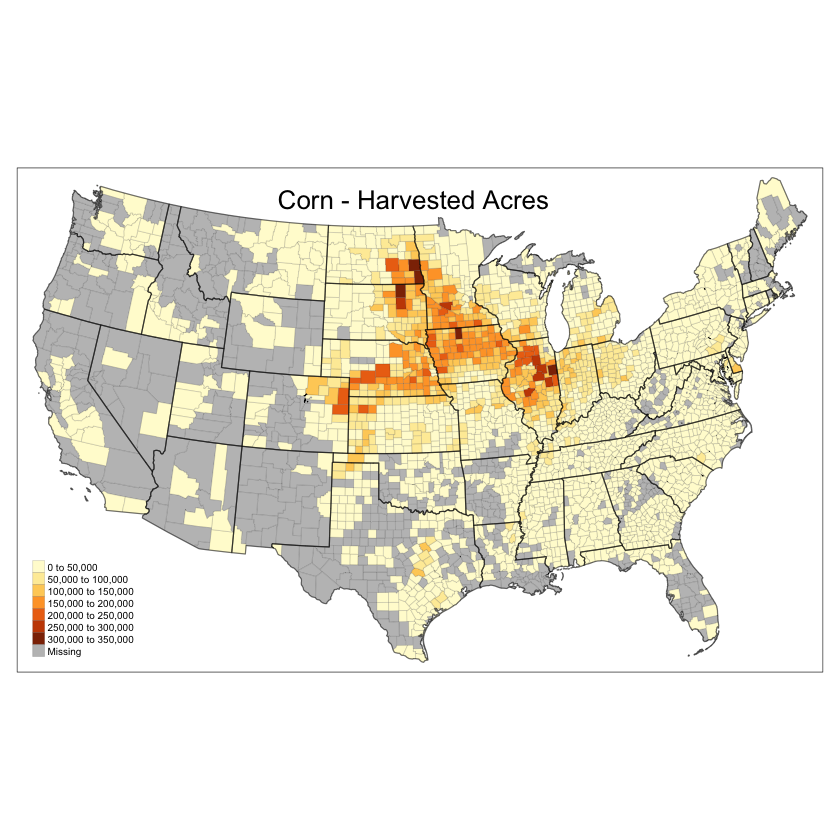

In [15]:
US_states <- unionSpatialPolygons(US, IDs=US$STATE)

tm_shape(US, projection="+init=epsg:2163") +
  tm_polygons("Value", border.col = "black", lwd=0.1, title="") +
  tmap_options(max.categories = 5) +
tm_shape(US_states) +
  tm_borders(lwd=1, col = "black", alpha = .5) +
tm_layout(title="Corn - Harvested Acres", 
          title.position = c("center", "top"),
          legend.text.size=0.5)

---